In [76]:
import os
import openai

# .envファイルからAPIキーを読み込む
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai.api_key = os.environ['OPENAI_API_KEY']

In [85]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
from langchain.agents import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType

In [99]:
# データの読み込み
df = pd.read_csv('../data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [125]:
# データフレームを操作するエージェントの作成
agent = create_pandas_dataframe_agent(
    OpenAI(temperature=0, max_tokens=1000),
    df,
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

# データフレームを操作するエージェントの作成
# agent = create_pandas_dataframe_agent(
#     ChatOpenAI(temperature=0, max_tokens=1000),
#     df,
#     verbose=True,
#     agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
# )

In [107]:
agent.run("データ数はいくつありますか？")



> Entering new  chain...
Thought: データフレームの行数を取得する必要があります
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 20640
Thought: データ数は20640です
Final Answer: データ数は20640です。

> Finished chain.


'データ数は20640です。'

In [108]:
agent.run("データの欠損値を確認してください。")



> Entering new  chain...
Thought: 欠損値を確認するにはどうすればいいか
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Thought: 欠損値があることがわかった
Final Answer: データフレームのtotal_bedrooms列に207個の欠損値があることがわかりました。

> Finished chain.


'データフレームのtotal_bedrooms列に207個の欠損値があることがわかりました。'



> Entering new  chain...
Thought: pandasのplot関数を使えば簡単に描けそう
Action: python_repl_ast
Action Input: df.plot.box(column='median_house_value')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: 箱ひげ図が描かれた
Final Answer: 箱ひげ図を描くことでmedian_house_valueの分布を確認できます。

> Finished chain.


'箱ひげ図を描くことでmedian_house_valueの分布を確認できます。'

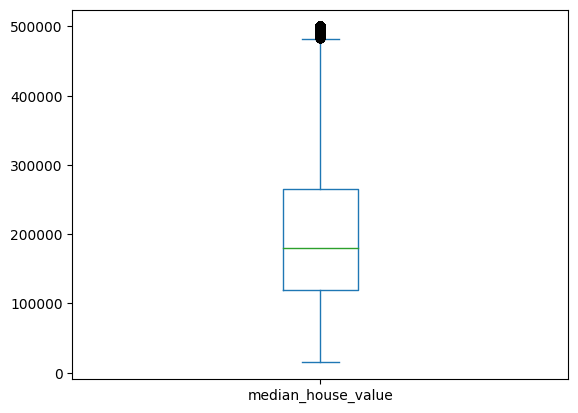

In [110]:
agent.run("median_house_valueの分布を箱ひげ図で描いてください。")



> Entering new  chain...
Thought: We can use the seaborn library to create a pairplot of the dataframe.
Action: python_repl_ast
Action Input:
```
import seaborn as sns
sns.pairplot(df)
```
Observation: <seaborn.axisgrid.PairGrid object at 0x138f28f40>
Thought:The pairplot has been created, but we need to display it.
Action: python_repl_ast
Action Input:
```
import matplotlib.pyplot as plt
plt.show()
```

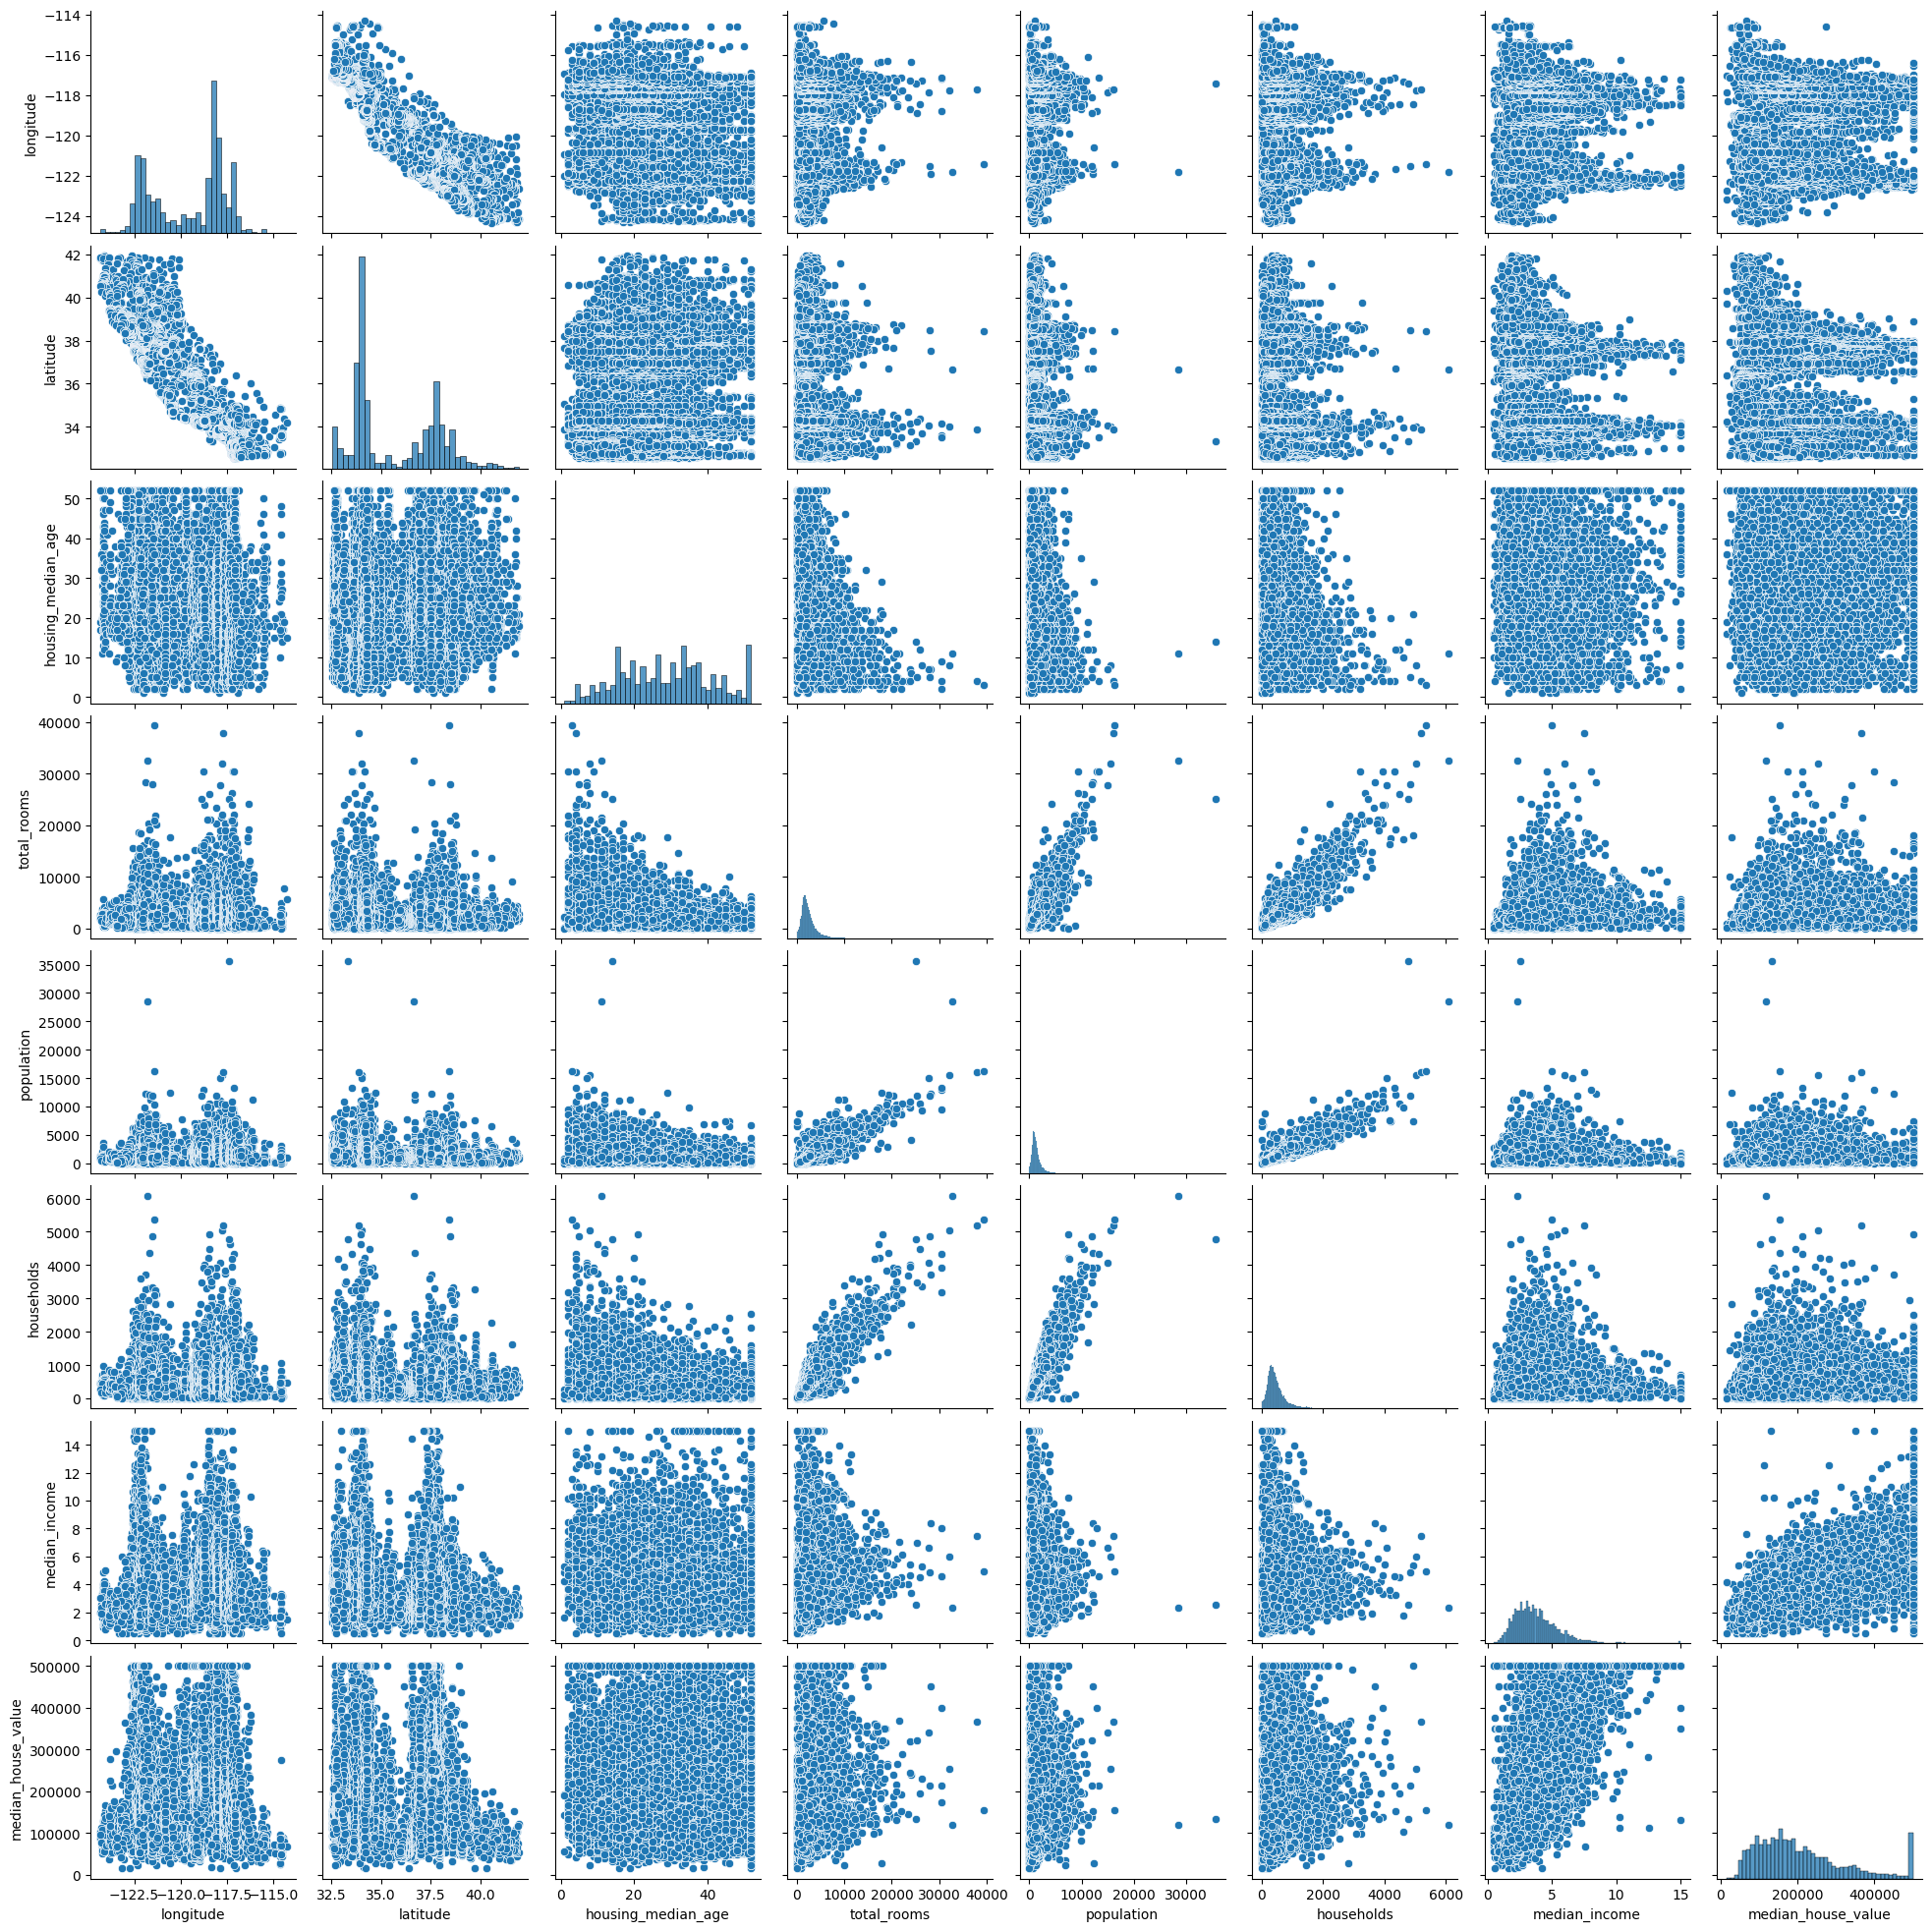


Observation: 
Thought:The pairplot has been displayed.
Final Answer: We can create a pairplot of the dataframe using seaborn and display it using matplotlib.

> Finished chain.


'We can create a pairplot of the dataframe using seaborn and display it using matplotlib.'

In [127]:
agent.run("各変数同士の関係をペアプロットで描いてください。")

In [126]:
text="""
住宅価格を線形回帰で予測してください。

入力データセットはdfです。
変数median_house_valueが目的変数です。

oceand_proximityとtotal_bedrooms変数は、説明変数から除外してください。

データセットを訓練用とテスト用に分割してください。データセットの70%を訓練用、30%をテスト用としてください。
訓練用データセットを使って予測モデルを作成し、テスト用データセットを使って予測精度を計算してください。
予測精度は、RMSEを計算してください。
"""
agent.run(text)



> Entering new  chain...
Thought: We need to preprocess the data first by removing the ocean_proximity and total_bedrooms columns. Then we need to split the data into training and testing sets. Finally, we can fit a linear regression model on the training set and evaluate its performance on the testing set using RMSE.
Action: python_repl_ast
Action Input:
```
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Remove ocean_proximity and total_bedrooms columns
df = df.drop(['ocean_proximity', 'total_bedrooms'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('median_house_value', axis=1), df['median_house_value'], test_size=0.3, random_state=42)

# Fit linear regression model on training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on testing set and calculate RMSE
y_pred = lr.predict(X_test)
rmse = mea

OutputParserException: Could not parse LLM output: `The RMSE is the evaluation metric for the linear regression model. The final answer is 69329.02886260756.`